In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from numpy.linalg import * 
plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
matplotlib.rcParams.update({'font.size': 17})

0.005017532601733368
1.4142112615195304


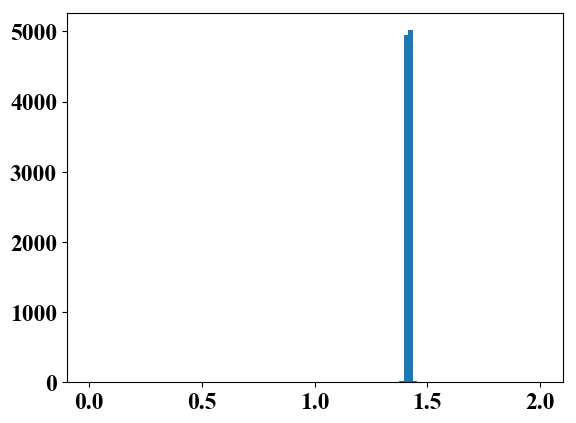

In [2]:
vals = []
dim = 10000
trials = 10000
for i in range(trials):
    X1 = np.random.randn(dim)
    X1 = X1/np.linalg.norm(X1)
    # A = np.hstack([A,np.ones((dim,1))])
    X2 = np.random.randn(dim)
    X2 = X2/np.linalg.norm(X2)
    B = X2-X1
    # vals.append(np.sum(X1*X2))
    vals.append(np.sqrt(np.sum((B)**2)))
print(np.std(vals)/np.mean(vals))
print(np.mean(vals))
a= plt.hist(vals,bins = np.linspace(0,2,100))

C:\Users\User\AppData\Local\Temp\ipykernel_27364\3450678735.py:18: RuntimeWarning: invalid value encountered in scalar divide
  info_factors.append(np.std(vals)/np.mean(vals))


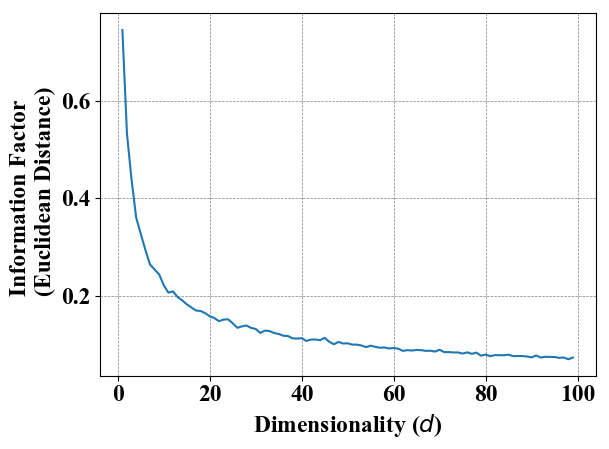

In [16]:
info_factors = [] 
dim_limit = 100
trials = 1000
for dim in range(dim_limit):
    vals = [] 
    for i in range(trials):
        X1 = np.random.randn(dim)
        X1 = X1
        # X1 = np.zeros_like(X1)
#         A = np.random.randn(dim,k)
        # A = np.hstack([A,np.ones((dim,1))])
        X2 = np.random.randn(dim)
        X2 = X2
        B = X2-X1
#         theta = np.matmul(np.linalg.pinv(A),B)
        # vals.append(np.sum(X1*X2))
        vals.append(np.sqrt(np.sum((B)**2)))
    info_factors.append(np.std(vals)/np.mean(vals))
plt.plot(info_factors)
plt.xlabel('Dimensionality ($d$)')
plt.ylabel('Information Factor \n (Euclidean Distance)')
plt.tight_layout()
plt.grid(True, which='both', color='black', linestyle='--', linewidth=0.5,alpha=0.5)
plt.savefig('if_euclid.png',bbox_inches='tight',dpi=500)

C:\Users\User\AppData\Local\Temp\ipykernel_26308\1818681440.py:12: RuntimeWarning: invalid value encountered in scalar divide
  info_factors_1.append(np.std(vals)/np.mean(vals))


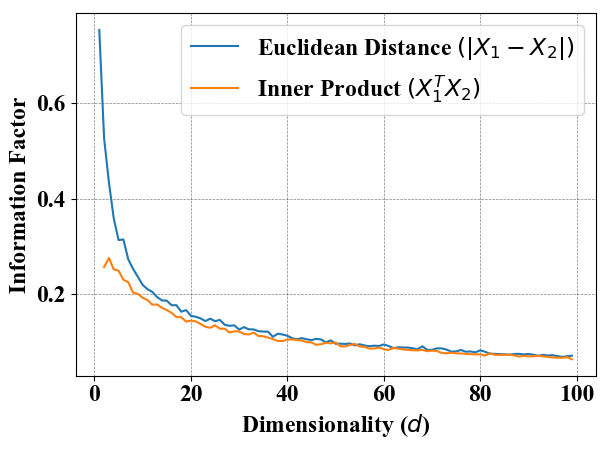

In [10]:

# First plot data
info_factors_1 = []
dim_limit = 100
trials = 1000
for dim in range(dim_limit):
    vals = []
    for i in range(trials):
        X1 = np.random.randn(dim)
        X2 = np.random.randn(dim)
        B = X2 - X1
        vals.append(np.sqrt(np.sum((B)**2)))
    info_factors_1.append(np.std(vals)/np.mean(vals))

# Second plot data
info_factors_2 = []
for dim in range(2, dim_limit):
    vals = []
    for i in range(trials):
        X1 = np.random.randn(dim)
        X1 = np.abs(X1 / np.linalg.norm(X1))
        X2 = np.abs(np.random.randn(dim))
        X2 = X2 / np.linalg.norm(X2)
        B = np.sum(X1*X2)
        vals.append(B)
        # vals.append(np.sqrt(np.sum((B)**2)))
    info_factors_2.append(np.std(vals)/np.mean(vals))

# Combine plots
plt.plot(range(dim_limit), info_factors_1, label=r'Euclidean Distance $(\| X_1 - X_2 \|)$')
plt.plot(range(2, dim_limit), info_factors_2, label=r'Inner Product $(X_1^T X_2)$')
plt.xlabel('Dimensionality ($d$)')
plt.ylabel('Information Factor')
plt.tight_layout()
plt.grid(True, which='both', color='black', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.savefig('combined_plot.png', bbox_inches='tight', dpi=500)
plt.show()


In [ ]:
info_factors = [] 
dim_limit = 100
trials = 1000



for dim in range(2,dim_limit):
    vals = [] 
    info_arr = [] 
    for _ in range(100):
        X2 = np.random.randn(dim)
        X2 = np.abs(X2)
        for i in range(trials):
            X1 = np.random.randn(dim)
            X1 = np.abs(X1)
            # X1 = np.zeros_like(X1)
            # A = np.random.randn(dim,k)
            # A = np.hstack([A,np.ones((dim,1))])
            
            # B = np.sum(X2*X1)
            # theta = np.matmul(np.linalg.pinv(A),B)
            # vals.append(np.sum(X1*X2))
            # vals.append(np.abs(B))
            B = X2-X1
            # vals.append(np.sum(X1*X2))
            # vals.append(np.sqrt(np.sum((B)**2)))
        info_arr.append(np.std(vals)/np.mean(vals))
    info_factors.append(np.mean(info_arr))
plt.plot(info_factors)

0.08862553688645936


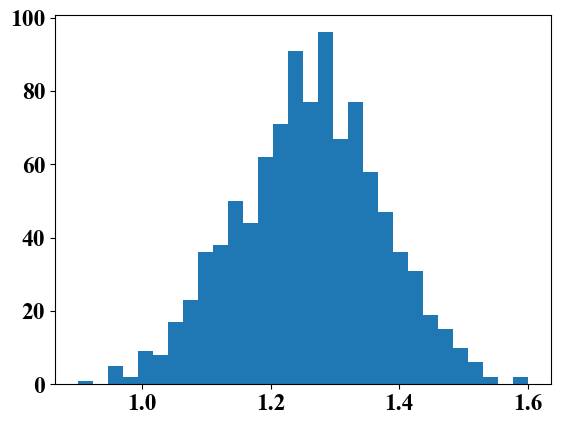

In [5]:
vals = []
dim = 50
k = 10
for i in range(trials):
    X1 = np.random.randn(dim)
    X1 = X1/np.linalg.norm(X1)
    # X1 = np.zeros_like(X1)
    A = np.random.randn(dim,k)
    # A = np.hstack([A,np.ones((dim,1))])
    X2 = np.random.randn(dim)
    X2 = X2/np.linalg.norm(X2)
    B = X2-X1
    theta = np.matmul(np.linalg.pinv(A),B)
    V = B - np.matmul(A,theta)
    # vals.append(np.sum(X1*X2))
    vals.append(np.sqrt(np.sum((V)**2)))
print(np.std(vals)/np.mean(vals))
a= plt.hist(vals,30)

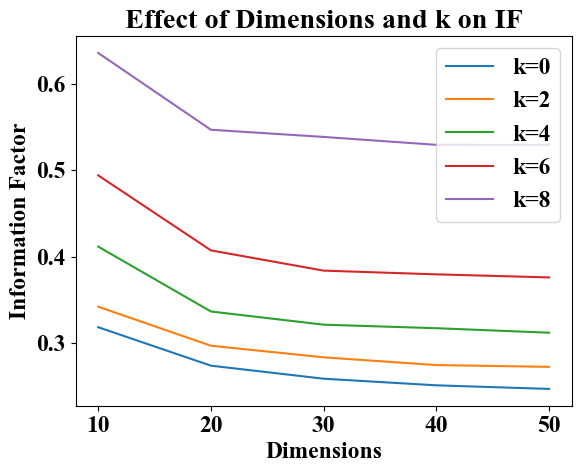

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
dims = [10, 20, 30, 40, 50]
k_limit = [0, 2, 4, 6, 8]
trials = 10000
W_creations = 20  # Number of times to create W for averaging
if_array = np.zeros((len(k_limit), len(dims)))

# Loop through k values and dimensions
for k in k_limit:
    for dim_index, dim in enumerate(dims):
        vals_over_W = []  # Store results over multiple W creations
        
        for _ in range(W_creations):  # Repeat for each creation of W
            vals = []
            
            # Generate a random weight matrix W for this dimension
            W = np.random.randn(dim, 10)  # Mapping from 10 to 'dim' dimensions
            
            # Define A to have the same first k projections as W
            if k > 0:
                A = W[:, :k]  # Take the first k columns of W
            else:
                A = None
            
            for i in range(trials):
                # Generate 10-dimensional vectors X1 and X2
                X1 = np.random.randn(10)
                X2 = np.random.randn(10)
                
                # Map X1 and X2 to dim dimensions using the weight matrix W
                X1_mapped = np.matmul(W, X1)
                X2_mapped = np.matmul(W, X2)
                
                # Compute the difference vector in the mapped space
                B = X2_mapped - X1_mapped
                
                if k == 0:
                    V = B
                else:
                    # Compute the projection of B onto the column space of A
                    theta = np.matmul(np.linalg.pinv(A), B)
                    V = B - np.matmul(A, theta)  # Residual after removing projection
                
                # Append the norm of V to the values list
                vals.append(np.sqrt(np.sum(V**2)))
            
            # Compute the relative standard deviation (coefficient of variation) for this W
            vals_over_W.append(np.std(vals) / np.mean(vals))
        
        # Average results over all W creations for this dimension
        if_array[k_limit.index(k), dim_index] = np.mean(vals_over_W)

# Plot the results
for i, k in enumerate(k_limit):
    plt.plot(dims, if_array[i, :], label=f'k={k}')
plt.xlabel('Dimensions')
plt.ylabel('Information Factor')
plt.legend()
plt.title('Effect of Dimensions and k on IF')
plt.show()


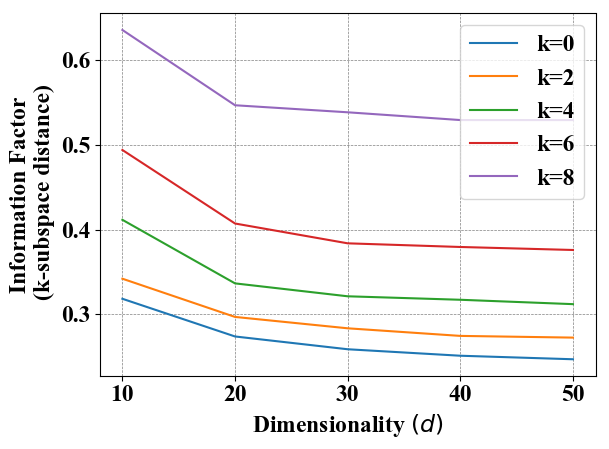

In [22]:
for i, k in enumerate(k_limit):
    plt.plot(dims, if_array[i, :], label=f'k={k}')
plt.xlabel('Dimensionality $(d)$')
plt.ylabel('Information Factor\n (k-subspace distance)')
plt.grid(True, which='both', color='black', linestyle='--', linewidth=0.5,alpha=0.5)
plt.legend(loc='upper right')

# plt.show()
plt.tight_layout()
plt.savefig('IF_low_intrinsic_dimensionality.png',bbox_inches='tight',dpi=500)

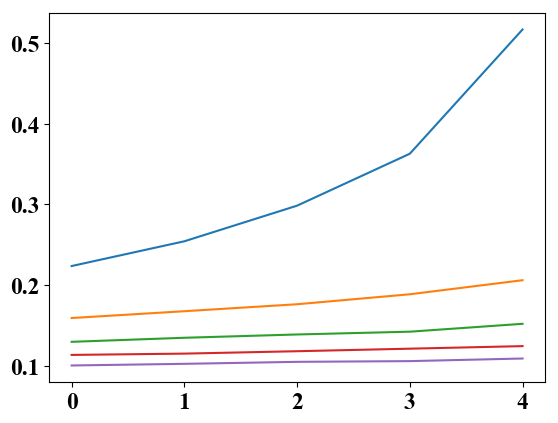

In [14]:

dims = [10,20,30,40,50]
k_limit = [0,2,4,6,8]
trials = 10000
if_array = np.zeros((len(k_limit),len(dims)))

for k in k_limit:
    for dim in dims:
        vals = [] 
        # A = np.random.randn(dim,k)
        A = np.random.randn(dim,k)
        for i in range(trials):
            X1 = np.random.randn(dim)
            X1 = X1
            # X1 = np.zeros_like(X1)
            
            # A = np.hstack([A,np.ones((dim,1))])
            X2 = np.random.randn(dim)
            X2 = X2
            B = X2-X1
            if k == 0:
                V = B 
            else:
                theta = np.matmul(np.linalg.pinv(A),B)
                V = B - np.matmul(A,theta)
            # vals.append(np.sum(X1*X2))
            vals.append(np.sqrt(np.sum((V)**2)))
        if_array[k_limit.index(k),dims.index(dim)] = np.std(vals)/np.mean(vals)
plt.plot(if_array)

[[0.22367421 0.15928105 0.12981699 0.11360167 0.10052122]
 [0.25434964 0.16772989 0.13483636 0.11521003 0.1025603 ]
 [0.29845973 0.1763652  0.1389254  0.11818687 0.10502754]
 [0.36279565 0.18871169 0.14237148 0.12132711 0.10591807]
 [0.51667097 0.20611489 0.15213111 0.12449252 0.1091509 ]]


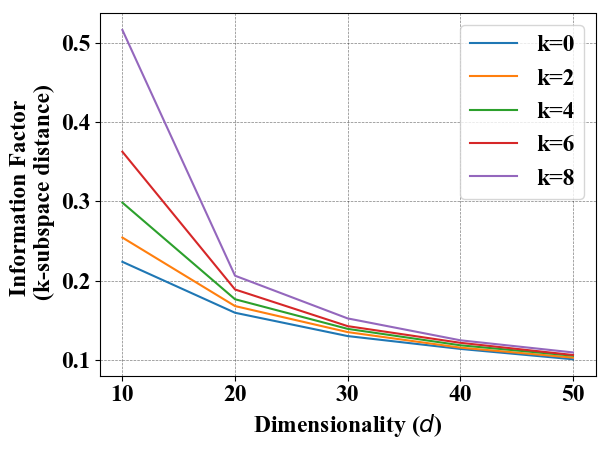

In [15]:
print(if_array)
lineObjects =plt.plot(dims,if_array.transpose())
plt.xticks(dims)
plt.legend(iter(lineObjects), ('k=0','k=2','k=4','k=6','k=8'))
plt.xlabel('Dimensionality ($d$)')
plt.ylabel('Information Factor \n (k-subspace distance)')
plt.tight_layout()
plt.grid(True, which='both', color='black', linestyle='--', linewidth=0.5,alpha=0.5)
plt.savefig('if_kspace.png',bbox_inches='tight',dpi=500)

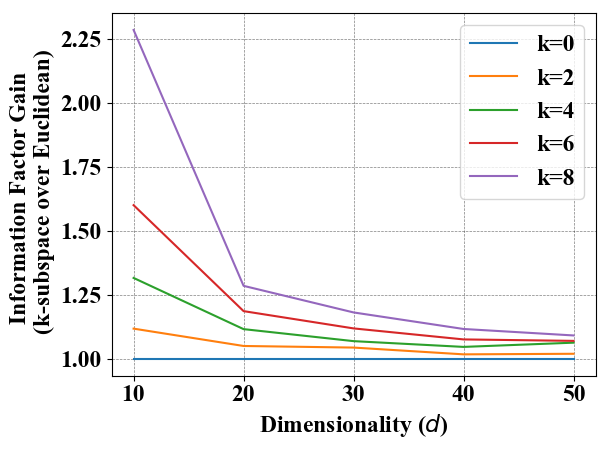

In [8]:
lineObjects =plt.plot(dims,(if_array/if_array[0]).transpose())
plt.xticks(dims)
plt.legend(iter(lineObjects), ('k=0','k=2','k=4','k=6','k=8'))
plt.xlabel('Dimensionality ($d$)')
plt.ylabel('Information Factor Gain \n (k-subspace over Euclidean)')
plt.tight_layout()
plt.grid(True, which='both', color='black', linestyle='--', linewidth=0.5,alpha=0.5)
plt.savefig('if_kspace_gain.png',bbox_inches='tight',dpi=500)

In [69]:
if_array/if_array[0]

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.11669851, 1.0524055 , 1.02512688, 1.02311203, 1.02573877],
       [1.28861203, 1.1047956 , 1.07794616, 1.03627451, 1.03430989],
       [1.60309016, 1.17429911, 1.12717714, 1.07905189, 1.06317618],
       [2.26655301, 1.29595258, 1.17823349, 1.13316678, 1.09475691]])

0.020214243094545795


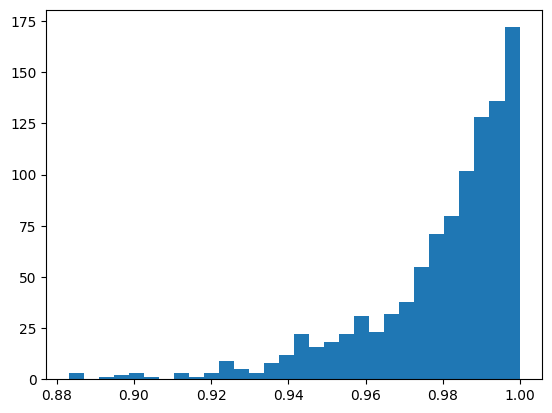

In [53]:
vals = []
dim = 50
k = 2
for i in range(trials):
#     X1 = np.random.randn(dim)
#     X1 = X1/np.linalg.norm(X1)
    # X1 = np.zeros_like(X1)
    A = np.random.randn(dim,k)
    # A = np.hstack([A,np.ones((dim,1))])
    X2 = np.random.randn(dim)
    X2 = X2/np.linalg.norm(X2)
    B = X2
    theta = np.matmul(np.linalg.pinv(A),B)
    V = B - np.matmul(A,theta)
    # vals.append(np.sum(X1*X2))
    vals.append(np.sqrt(np.sum((V)**2)))
print(np.std(vals)/np.mean(vals))
a= plt.hist(vals,30)

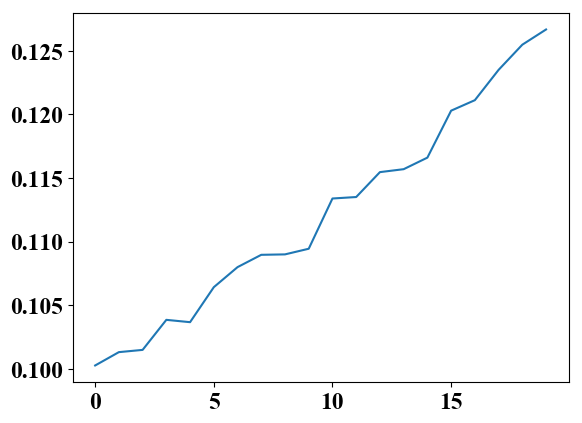

In [13]:
info_factors = [] 
dim = 50
k_limit = 20
trials = 10000
for k in range(k_limit):
    vals = [] 
    for i in range(trials):
        X1 = np.random.randn(dim)
        X1 = X1
        # X1 = np.zeros_like(X1)
        A = np.random.randn(dim,k)
        # A = np.hstack([A,np.ones((dim,1))])
        X2 = np.random.randn(dim)
        X2 = X2
        B = X2
        theta = np.matmul(np.linalg.pinv(A),B)
        V = B - np.matmul(A,theta)
        # vals.append(np.sum(X1*X2))
        vals.append(np.sqrt(np.sum((V)**2)))
    info_factors.append(np.std(vals)/np.mean(vals))
plt.plot(info_factors)